<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nombre          1816 non-null   object 
 1   Marca           1816 non-null   object 
 2   Modelo          1816 non-null   object 
 3   RAM             1333 non-null   float64
 4   Almacenamiento  1791 non-null   float64
 5   Color           1816 non-null   object 
 6   Telefonia       1816 non-null   object 
 7   Precio          1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB
None
              RAM  Almacenamiento       Precio
count  1333.00000     1791.000000  1816.000000
mean      5.96099      162.652150   492.175573
std       2.66807      139.411605   398.606183
min       1.00000        2.000000    60.460000
25%       4.00000       64.000000   200.990000
50%       6.00000      128.000000   349.990000
75%       8.00000      256.000000   652.717500
max      

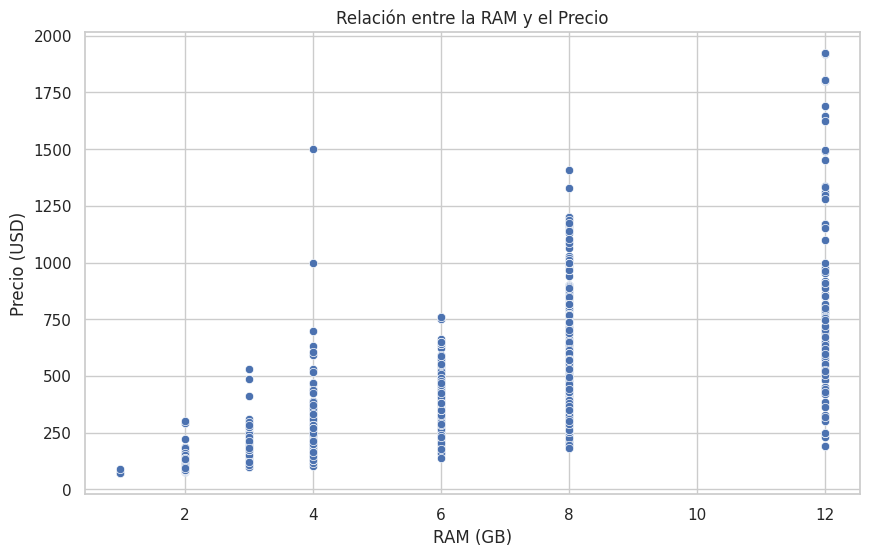

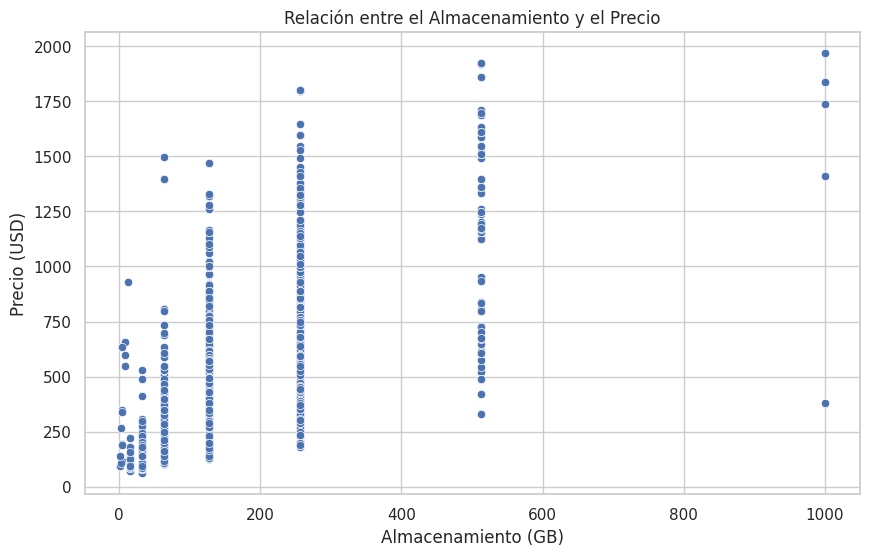

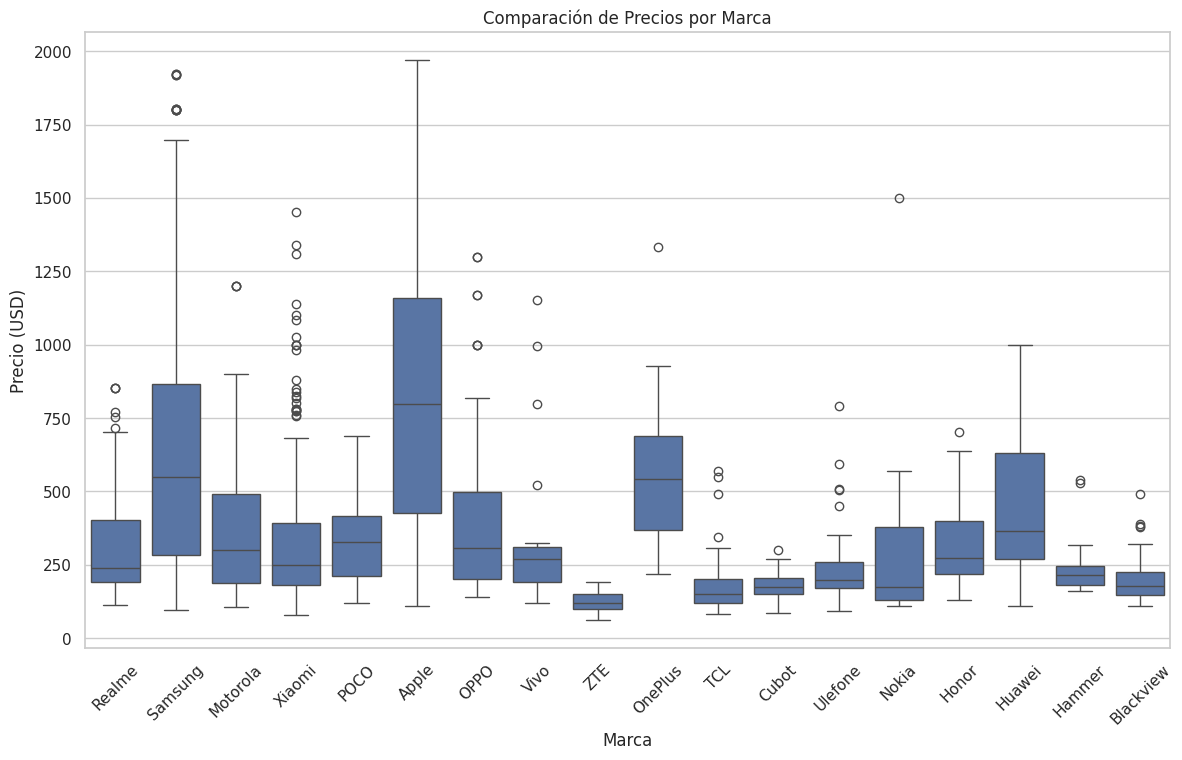

In [44]:
"""
Análisis de Datos de Smartphones
Este script analiza un dataset de smartphones para determinar los factores más influyentes en el precio de los dispositivos.
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
sns.set(style="whitegrid")

# Cargar el dataset
file_path = 'smartphones.csv'
smartphones_df = pd.read_csv(file_path)

# Información básica del dataset
print(smartphones_df.info())
print(smartphones_df.describe())

# Eliminar filas con valores nulos en las columnas de interés
smartphones_df = smartphones_df.dropna(subset=['Precio', 'Almacenamiento'])

# Convertir la columna 'Precio' a tipo numérico (en caso de que esté en formato string)
smartphones_df['Precio'] = pd.to_numeric(smartphones_df['Precio'], errors='coerce')

# Filtrar los datos para eliminar outliers en el precio
smartphones_df = smartphones_df[(smartphones_df['Precio'] > 50) & (smartphones_df['Precio'] < 2000)]


def graficar_precios_por_marca(marca):
    """
    Esta función toma una marca de smartphones como entrada y genera una gráfica
    de boxplots que muestra la distribución de los precios de cada modelo,
    diferenciando por almacenamiento.
    """
    # Filtrar el dataset para la marca especificada
    marca_df = smartphones_df[smartphones_df['Marca'].str.lower() == marca.lower()]

    # Ordenar por nombre de modelo y almacenamiento
    marca_df = marca_df.sort_values(by=['Modelo', 'Almacenamiento'])

    # Determinar el tamaño de la figura basado en el número de modelos
    num_modelos = marca_df['Modelo'].nunique()
    height = max(6, num_modelos * 0.5)
    width = max(14, num_modelos * 0.7)

    # Generar la gráfica de boxplots
    plt.figure(figsize=(width, height))
    sns.boxplot(data=marca_df, x='Modelo', y='Precio', hue='Almacenamiento', palette='husl')

    plt.title(f'Distribución de Precios de {marca}')
    plt.xlabel('Modelo')
    plt.ylabel('Precio (USD)')
    plt.xticks(rotation=45)
    plt.legend(title='Almacenamiento', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

# Crear categorías de precio
def categorizar_precio(precio):
    """
    Esta función categoriza los smartphones en tres categorías basadas en su precio:
    - Económico: Menos de 300 USD
    - Medio: Entre 300 y 700 USD
    - Caro: Más de 700 USD
    """
    if precio < 300:
        return 'Económico'
    elif 300 <= precio <= 700:
        return 'Medio'
    else:
        return 'Caro'
# Aplicar la función de categorización a la columna 'Precio'
smartphones_df['Categoria_Precio'] = smartphones_df['Precio'].apply(categorizar_precio)

# Contar el número de smartphones en cada categoría de precio
categorias = ['Económico', 'Medio', 'Caro']
conteo_categorias = {categoria: 0 for categoria in categorias}

for categoria in smartphones_df['Categoria_Precio']:
    if categoria in conteo_categorias:
        conteo_categorias[categoria] += 1

# Visualizar la relación entre la RAM y el precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAM', y='Precio', data=smartphones_df)
plt.title('Relación entre la RAM y el Precio')
plt.xlabel('RAM (GB)')
plt.ylabel('Precio (USD)')
plt.show()

# Visualizar la relación entre el almacenamiento y el precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Almacenamiento', y='Precio', data=smartphones_df)
plt.title('Relación entre el Almacenamiento y el Precio')
plt.xlabel('Almacenamiento (GB)')
plt.ylabel('Precio (USD)')
plt.show()

# Filtrar las marcas con más de 10 registros para una mejor visualización
brands = smartphones_df['Marca'].value_counts()
common_brands = brands[brands > 10].index
filtered_smartphones_df = smartphones_df[smartphones_df['Marca'].isin(common_brands)]

# Visualizar la comparación de precios por marca
plt.figure(figsize=(14, 8))
sns.boxplot(x='Marca', y='Precio', data=filtered_smartphones_df)
plt.title('Comparación de Precios por Marca')
plt.xlabel('Marca')
plt.ylabel('Precio (USD)')
plt.xticks(rotation=45)
plt.show()




In [45]:
# Imprimir el conteo de categorías
print("Conteo de categorías de precio:")
for categoria, conteo in conteo_categorias.items():
    print(f"{categoria}: {conteo}")

Conteo de categorías de precio:
Económico: 790
Medio: 589
Caro: 407


Ingrese la marca de smartphones que desea analizar: apple


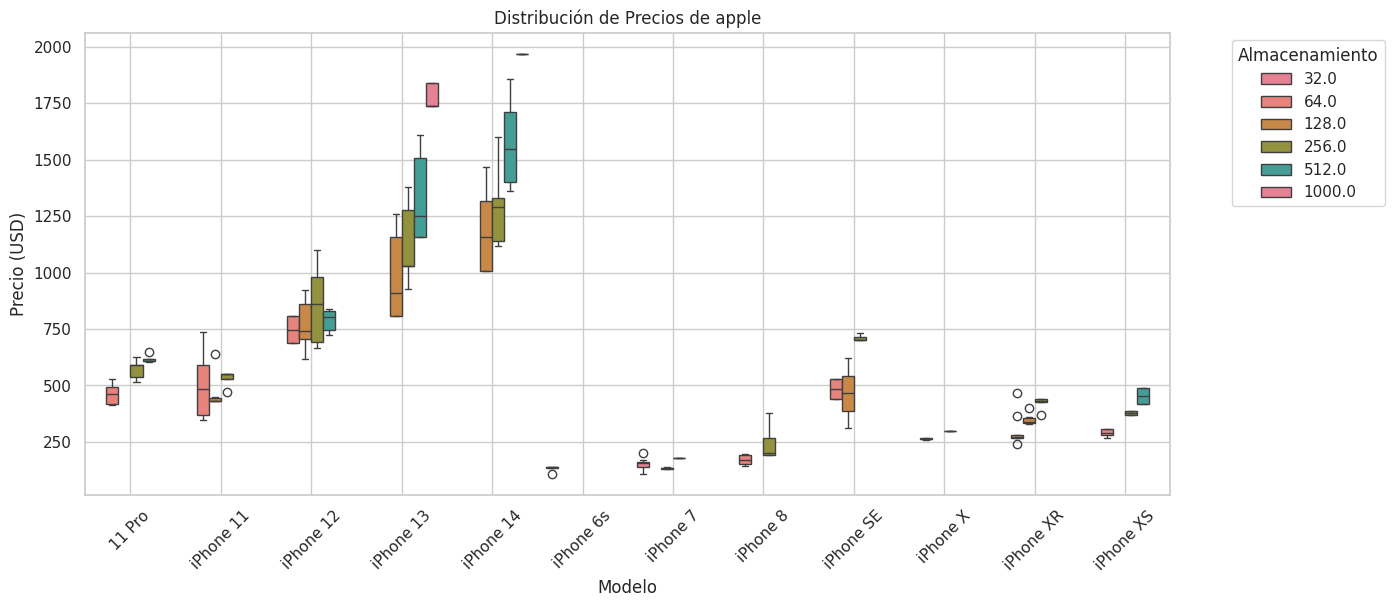

In [46]:
# Ejecuta el script
marca = input("Ingrese la marca de smartphones que desea analizar: ")
graficar_precios_por_marca(marca)